<h1><center>Implementação de um Agente Inteligente</center></h1>

##### **Baseado em: https://artint.info/AIPython/**

### **Implementando uma classe display para mostrar o Agente e o Ambiente:**

In [2]:
# a classe faz um display a quantidade de detalhes e definida por uma variavel
class Displayable(object):
    
    # pode ser sobrescrito em subclasses
    nivel_max_display = 1
    
    # método que imprime os argumentos desde que o nivel seja menor ou igual nivel_max_display 
    # nivel é um numero inteiro já as outras variaveis são quaisquer argumentos advindos das necessidades
    # * tupla de argumentos, ** dicioanrio de argumetos
    def display(self, nivel, *agrumentos, **nargumentos):
        
        if nivel <= nivel_max_display:
            
            print(*argumentos, **nargumentos)

In [3]:
# Função para visualização interativa:
def visualização():
    
    return func

## **Definição de um Agente:**

#### Um Agente é tudo que oide ser considerado capaz de perceber seu ambiente por meio de sensores e de agir sobre esse ambiente por intermedio de atuadores. Para cada sequência de percepções possível, um agente racional deve selecionar uma ação que se espera e que venha maximizar sua medida de desempenho, dada a evidência fornecida pela sequência de percepções e por qualquer conhecimento interno do agente.

In [4]:
# Implementação da classe do agente:
class Agente():
    
    # método construtor em python:
    def __init__(self, ambiente):
        
        # atributo ambiente de Agente recebe o valor do ambiente inputado:
        self.ambiente = ambiente
        
    # método referente a ação que o agente pratica, com o numero de etapas:
    def acao(self, num):
        
        # Implementação de um erro pois este método é abstrato
        raise NotImplementedError("Ação") 

## **Definição de um Ambiente:**

#### tudo que rodeia ou envolve os seres vivos e/ou as coisas. em inteligencia artificial podemos entender , que são essencialmente os “problemas” para os quais os agentes racionais são as “soluções”.

In [5]:
# Implementação da classe ambiente que descende de display:
class Ambiente(Displayable):
    
    # retorna as percepções iniciais do agente:
    def prececao_inicial(self):
     
        # mensagem de erro:
        raise NotImplementedError("Percepção Inicial")   # método abstrato   
    
    # faz a ação no ambiente e retorna a próxima percepção:
    def fazer(self, acao): 
        
        # mensagem de erro:
        raise NotImplementedError("Fazer Ação:")   # método abstrato    

### **Subclasse de Ambiente:**

In [6]:
# Importando uma biblioteca de randomização:
import random

# Implementação da subclasse de ambiente:
class TP_Ambiente(Ambiente):
    
    # variavel precos que é uma lista:
    precos = [234, 234, 234, 234, 255, 255, 275, 275, 211, 211, 211,
    234, 234, 234, 234, 199, 199, 275, 275, 234, 234, 234, 234, 255,
    255, 260, 260, 265, 265, 265, 265, 270, 270, 255, 255, 260, 260,
    265, 265, 150, 150, 265, 265, 270, 270, 255, 255, 260, 260, 265,
    265, 265, 265, 270, 270, 211, 211, 255, 255, 260, 260, 265, 265,
    260, 265, 270, 270, 205, 255, 255, 260, 260, 265, 265, 265, 265,
    270, 270]
    
    # maximo de valor aleatorio para se obter o preço:
    preco_maximo_add = 20 
    
    # método construtor da classe ambiente
    def __init__(self):
        
        # Agente comprador de papel:
        self.tempo = 0
        self.estoque = 0
        self.historico_estoque = [] # memoria do historico de estoque
        self.historico_preco = [] # memoria do historico de preco
        
    # método que retorna a persepção inicial do ambiente pelo agente  
    def percepcao_inicial(self):
        
        
        # A lista do historico armazena o que esta sendo percebido agora
        self.historico_estoque.append(self.estoque)
        
        # o primeiro preço da lista recebe somado a um outro valor da lista e armazenado em preço:
        preco = self.precos[0] + random.randrange(self.preco_maximo_add)
        
        # Então o historico_preco recebe uma atualização dos valores:
        self.historico_preco.append(preco)
        
        # resposta da função:
        return {'Preço': preco,
                'Em estoque': self.estoque}
    
    # método que fazr a ação compra e retorna percepções (preço e estoque) 
    def fazer(self, acao):
        
        # definindo valores usados
        usado = pegador_dicionario({6:0.1, 5:0.1, 4:0.2, 3:0.3, 2:0.2, 1:0.1})
        
        # definindo no dicionario uma chave comprar:
        comprado = acao['Comprar']
        
        # definindo estoque = estoque anterior + o que foi comprado - usado
        self.estoque = self.estoque + comprado - usado
        
        # atualizando valores no historico estoque:
        self.historico_estoque.append(self.estoque)
        
        # atualizando tempo:
        self.tempo += 1
        
        # Atualização de preço:
        preco = ( self.precos[self.tempo % len(self.precos) ] + random.randrange(self.preco_maximo_add) + self.tempo/2)   
        
        # adicionando preço ao historico de preços
        self.historico_preco.append(preco)
        
        # retorno da função:
        return {'Preço': preco,
                'Em estoque': self.estoque}

### **Função Pegar dicionario:**

In [7]:
# função que retorna um valor de uma distribuição:  
def pegador_dicionario(item_dicionario_probabilidades):
    
    # retorna um item escolhido proporcionalmente à sua probabilidade:
    randomico = random.random()
    
    for (item, probabilidade) in item_dicionario_probabilidades.items():
        
        if randomico < probabilidade:
            
            return item
        
        else:
            
            randomico -= probabilidade
    
    # mensagem de erro:
    raise RuntimeError(str(item_dicionario_probabilidades)+ "não é uma distribuição de probabilidade" )

### **Subclasse de Agente:**

In [8]:
class TP_Agente(Agente):
    
    # método construtor:
    def __init__(self, ambiente):
        
        # Atributos do agente:
        self.ambiente = ambiente
        self.gasto = 0
        percepcao = ambiente.percepcao_inicial()
        self.avercao = percepcao['Preço']
        self.ultimo_preco = percepcao['Preço']
        self.estoque = percepcao['Em estoque']
        
    # método de ação do ambiente:  
    def fazer(self, n):
        
        # faz por n rodadas:
        for i in range(n):
            
            if self.ultimo_preco < 0.9*self.avercao and self.estoque < 60:
                comprar = 48
            
            elif self.estoque < 12:
                comprar = 12
            else:
                comprar = 0
            
            self.gasto += comprar * self.ultimo_preco
            percepcao = self.ambiente.fazer({'Comprar': comprar})
            
            self.ultimo_preco = percepcao['Preço']
            self.avercao = self.avercao + (self.ultimo_preco - self.avercao)*0.05
            self.estoque = percepcao['Em estoque']     

## Objetos:

In [9]:
# Objeto ambiente:
ambiente = TP_Ambiente()

# Objeto Agente:
a = TP_Agente(ambiente)

In [10]:
# a.fazer(90) 
# a.gasto/amb.tempo # gasto por tempo

## **Visualização:**

In [11]:
# Importando biblioteca de visualização:
import matplotlib.pyplot as plt

## Classe Visualização dos preços:

In [12]:
class PlotPrecos(object):
    
    # método construtor, setando o plot para o historico de preços e numero em estoque:
    def __init__(self, agente, ambiente):
        
        # instanciando os atributos de plotPrecos com agente e ambiente inputados
        self.agente = agente
        self.ambiente = ambiente
        
        # plot com matplotlib
        plt.ion()
        
        # definindo o rótulo que ficará na horizontal
        plt.xlabel('Tempo')
             
        # definindo o rótulo que ficará na vertical
        plt.ylabel('Numero em estoque.                                              Preço.')
    
    # plotagem do histórico de preço e estoque
    def rodar_plot(self):
        
        # numero recebe a quantidade de valores em estoque:
        num = len(ambiente.historico_estoque)
        
        # plotagem do estoque no alcance definido exatamente para essa quantidade de valores
        plt.plot(range(num), ambiente.historico_estoque, label='Em Estoque')
        
        # plotagem do estoque no alcance definido exatamente para essa quantidade de valores
        plt.plot(range(num), ambiente.historico_preco, label='Preço')
        
        # caso queira legendas:
        # plot.legend(loc="upper left")
        
        # desenhando o plot na tela
        plt.draw()    

## **Objeto Visualizavel:**

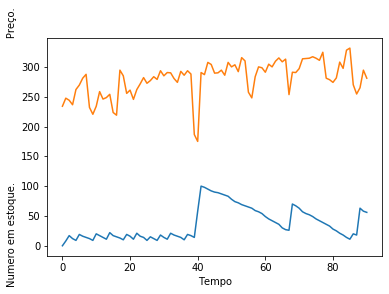

In [13]:
pl = PlotPrecos(a,ambiente)
a.fazer(90); pl.rodar_plot()